In [1]:
import numpy as np
from numpy.random import multivariate_normal as mvn
from matplotlib import pyplot as plt
import pandas as pd
from scipy.optimize import minimize

In [2]:
np.random.seed(78)
N = 10
T = 500
mean = np.zeros(N) 
covs = np.identity(N)/(N**2)
X = mvn(mean = mean, cov = covs, size = T)

np.random.seed(200)
m = 30000
wGrid = np.random.uniform(low = 0, high = 2, size = (m,N))
randDict = {}
sharpeDict = {}
for i in range(0,m):
    wGrid[i] /= np.sum(wGrid[i])
    w = wGrid[i]
    dailyReturns = np.dot(X, w)
    stDev = dailyReturns.std(ddof = 1)*np.sqrt(252.0)
    mu = dailyReturns.mean()
    randDict[stDev] = (1 + dailyReturns).prod()**(252.0/T) - 1
    sharpeDict[stDev] = 252*mu/stDev

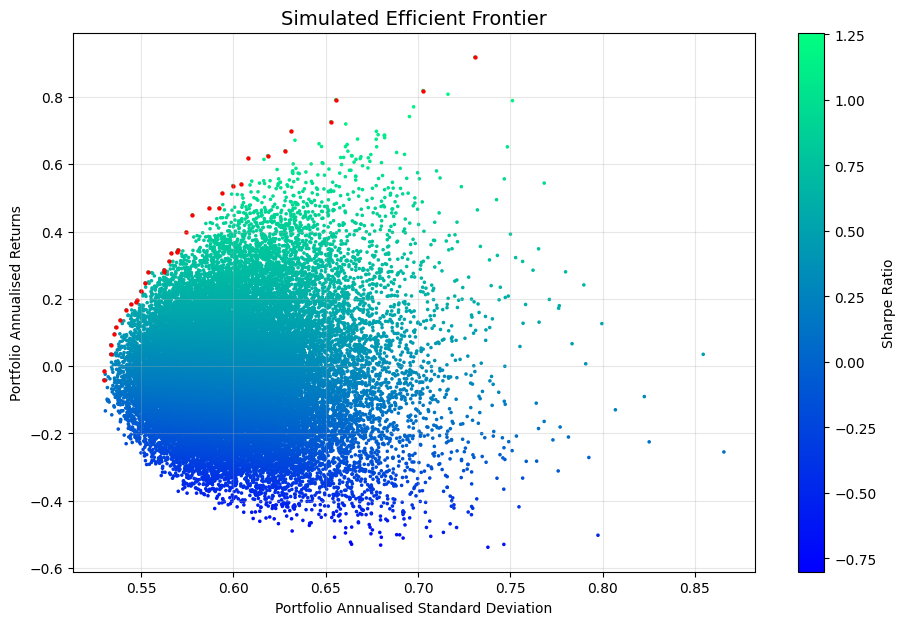

In [8]:
fpFig = '../../code/figures'

s = pd.Series(randDict)
sR = pd.Series(sharpeDict)

from scipy.interpolate import make_interp_spline, BSpline
intervals = pd.cut(sorted(s.index), 5000, include_lowest = True, retbins=True)[-1]
sMax = s.loc[sorted(s.index)]
maxDict = {}
for i in intervals[1:-150]:
    maxDict[i] = sMax.loc[:i].max()
maxSer = pd.Series(maxDict).unique()

fig, ax = plt.subplots(figsize = (11,7))
im = ax.scatter(y = s, x = s.index, c = sR, s = 2.5, cmap = 'winter')
fig.colorbar(im, ax = ax, label = 'Sharpe Ratio', drawedges = False)
ax.grid(alpha = 0.3)
ax.scatter(y = maxSer, x = [s[s == m].index[0] for m in maxSer], color = 'red', s = 4.5)
ax.set_ylabel('Portfolio Annualised Returns')
ax.set_xlabel('Portfolio Annualised Standard Deviation')
ax.set_title('Simulated Efficient Frontier', fontsize = 14)
plt.savefig(f'{fpFig}/sim_eff_front.png', bbox_inches='tight')
plt.show()